In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=dde49915df87450825bf5f744b0e86d29bfe5cb37510f76c812c865953a85202
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib

In [4]:
df = pd.read_csv("sample_pandas_6.csv")
df

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24
...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48


In [5]:
category_df = pd.read_csv("category.csv")
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [6]:
df = pd.merge(df, category_df[["商品番号", "カテゴリー"]], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当
...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート


In [7]:
dfc = df['カテゴリー'].value_counts()
dfc

弁当       49
菓子類      38
飲料水      36
デザート     30
雑貨       27
図書・新聞    20
Name: カテゴリー, dtype: int64

In [8]:
dfc["弁当"]

49

In [9]:
dfc.index

Index(['弁当', '菓子類', '飲料水', 'デザート', '雑貨', '図書・新聞'], dtype='object')

In [10]:
dfc.values

array([49, 38, 36, 30, 27, 20])

In [11]:
import numpy as np
np.arange(0,6)

array([0, 1, 2, 3, 4, 5])

Text(0, 0.5, '個数')

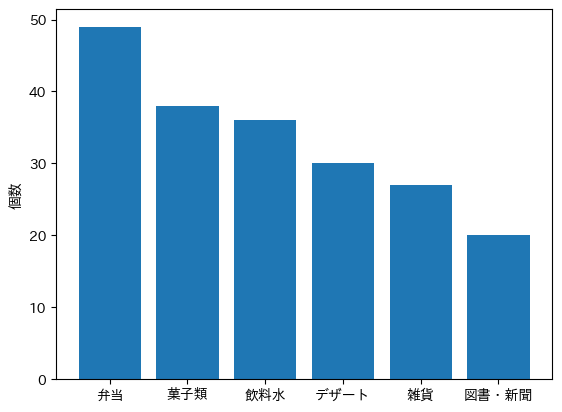

In [12]:
plt.bar(np.arange(0,6),dfc.values)
plt.xticks(np.arange(0,6),dfc.index )
plt.ylabel("個数")

In [13]:
df.groupby("商品番号")["注文数"].sum()


商品番号
1QJFO8QY    1128
2HSTCDWM     588
48XMJXKO     216
8T7D5DQA     528
MESUDVWQ     744
QRMOGNUU     894
S6RE8W6X     666
X0ZE2ZMY     306
YY4HAAZR     540
Z4WOOIYV     588
Name: 注文数, dtype: int64

In [14]:
df.groupby("商品番号")["注文数"].describe()

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0
